## Assignment 2: Machine Learning
I wanted to predict passenger data for Ruter, but I couldn't find the data file (Ruter_data.csv) said to have been used for assignment 1.
I therefore decided to use the flight data from assignment 1, to predict flight delays during a specific time of day.
* Edit : I found the ruter file after I was over halfway with my flights algorithm, so I hope it's okay that I turn in what I've done.

#### Predicting Flight Delays
In this assignment, I present a prediction algorithm which predicts the minutes of delay at input time. The input is the time of day and the output is the amount of minutes of delay. The prediction percentage score will also be presented. 

* Data file: flight.csv
* Algorithm Choice: Regression

#### Reason for Choosing Regression
Regression is an algorithm designed for predicting continuous numerical values, which makes it ideal for predicting minutes of delay.

The goal is to predict a continuous numeric value (i.e., the delay in minutes) and I'm trying to understand the relationship between time of day and minutes of delay. Regression models are specifically designed to capture and quantify the relationships between input features (independent variables) and the target output (dependent variable). This will allow me to model how the minutes of delay change as the time of day varies.

#### Nice to Know
The delay in minutes is a positive number, while a negative number represents flights arriving before schedule in minutes.

In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import datetime


Correlation between Hour of Day and Delay: -0.1109563215385208


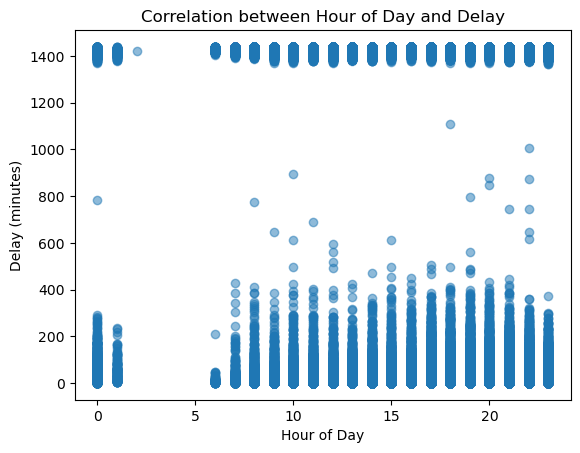

In [18]:
# Load the dataset
url = "data/flight.csv"
df = pd.read_csv(url)

# Convert the 'datetime_val', 'arr_time', and 'sched_arr_time' columns 
# to datetime objects, handling errors by coercing to NaT (Not-a-Time)
df['datetime_val'] = pd.to_datetime(df['datetime_val'])
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'])
df['arr_time'] = pd.to_datetime(df['arr_time'])

# Create a new column 'scheduled_date' to store the scheduled arrival date
df['scheduled_date'] = df['sched_arr_time'].dt.date

# Calculate the delay by subtracting 'sched_arr_time' from 'arr_time'
df['delay'] = (df['arr_time'] - df['sched_arr_time']).dt.total_seconds() / 60

# Handle flights that cross midnight
df['delay'] = np.where(df['arr_time'] < df['sched_arr_time'], df['delay'] + 1440, df['delay'])

# Extract the time of day (hour) from the 'sched_arr_time' column
df['hour_of_day'] = df['sched_arr_time'].dt.hour

# Calculate the correlation between 'hour_of_day' and 'delay'
correlation = df['hour_of_day'].corr(df['delay'])

print(f"Correlation between Hour of Day and Delay: {correlation}")

# Create a scatter plot to visualize the correlation between 'hour_of_day' and 'delay'
plt.scatter(df['hour_of_day'], df['delay'], alpha=0.5)
plt.xlabel('Hour of Day')
plt.ylabel('Delay (minutes)')
plt.title('Correlation between Hour of Day and Delay')
plt.grid(True)
plt.show()


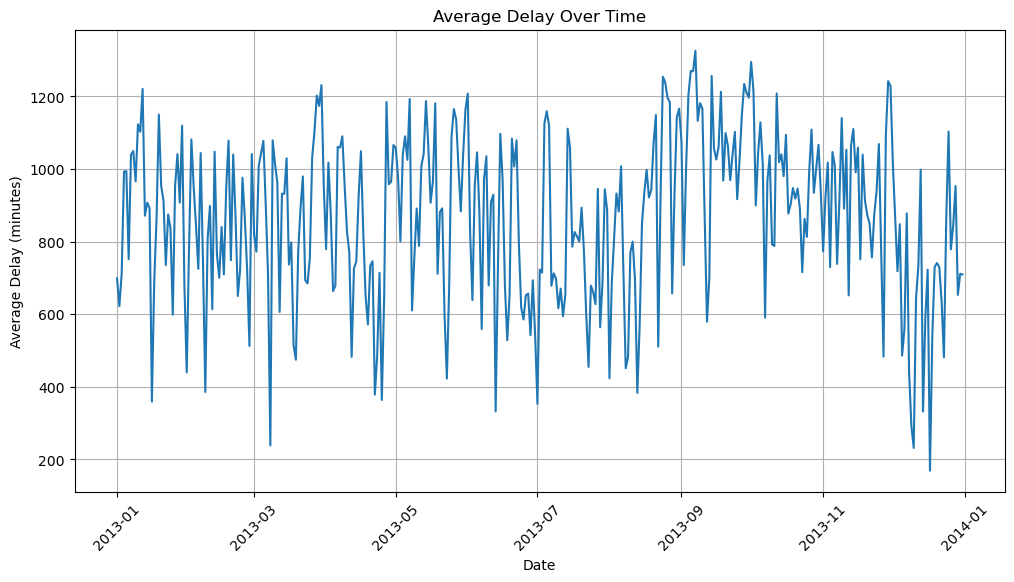

In [16]:
# Extract the date from the 'datetime_val' column
df['date'] = pd.to_datetime(df['datetime_val']).dt.date

# Group the data by date and calculate the average delay for each date
date_delay = df.groupby('date')['delay'].mean().reset_index()

# Create a line plot to visualize the average delay over time
plt.figure(figsize=(12, 6))
plt.plot(date_delay['date'], date_delay['delay'])
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [17]:
# Prepare the data
X = df[['hour_of_day']]
y = df['delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the delay at 15:00
# Create a DataFrame with an 'hour_of_day' column and a value of 15
prediction_input = pd.DataFrame({'hour_of_day': [15]})
predicted_delay_at_1500 = model.predict(prediction_input)

print(f"Predicted delay at 15:00: {predicted_delay_at_1500[0]} minutes")

ValueError: Input y contains NaN.